# Data Meaning Type


In [1]:
import numpy as np 
import pandas as pd

# Graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Models
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Load dataset


In [3]:
dataset = pd.read_csv("cardio_train.csv", sep = ";",index_col='id')

# Data Quality


In [4]:

df = dataset.copy()

In [5]:
df.drop_duplicates(inplace=True)

## Transformations

In [6]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69976 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69976 non-null  int64  
 1   gender       69976 non-null  int64  
 2   height       69976 non-null  int64  
 3   weight       69976 non-null  float64
 4   ap_hi        69976 non-null  int64  
 5   ap_lo        69976 non-null  int64  
 6   cholesterol  69976 non-null  int64  
 7   gluc         69976 non-null  int64  
 8   smoke        69976 non-null  int64  
 9   alco         69976 non-null  int64  
 10  active       69976 non-null  int64  
 11  cardio       69976 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,69976.0,19468.950126,2467.374620,10798.0,17664.0,19703.0,21327.0,23713.0
gender,69976.0,1.349648,0.476862,1.0,1.0,1.0,2.0,2.0
height,69976.0,164.359152,8.211218,55.0,159.0,165.0,170.0,250.0
weight,69976.0,74.208519,14.397211,10.0,65.0,72.0,82.0,200.0
ap_hi,69976.0,128.820453,154.037729,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69976.0,96.636261,188.504581,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69976.0,1.366997,0.680333,1.0,1.0,1.0,2.0,3.0
gluc,69976.0,1.226535,0.572353,1.0,1.0,1.0,1.0,3.0
smoke,69976.0,0.088159,0.283528,0.0,0.0,0.0,0.0,1.0
alco,69976.0,0.053790,0.225604,0.0,0.0,0.0,0.0,1.0


In [10]:
# Converting the days to years
df["age"] = df["age"].apply(lambda x: round(x/365))

In [11]:
# Need to determine which gender is male and which is female to draw any conclusions. First convert 1/2 to 0/1. 
df["gender"] = df["gender"].apply(lambda x: x-1)

# Outliers

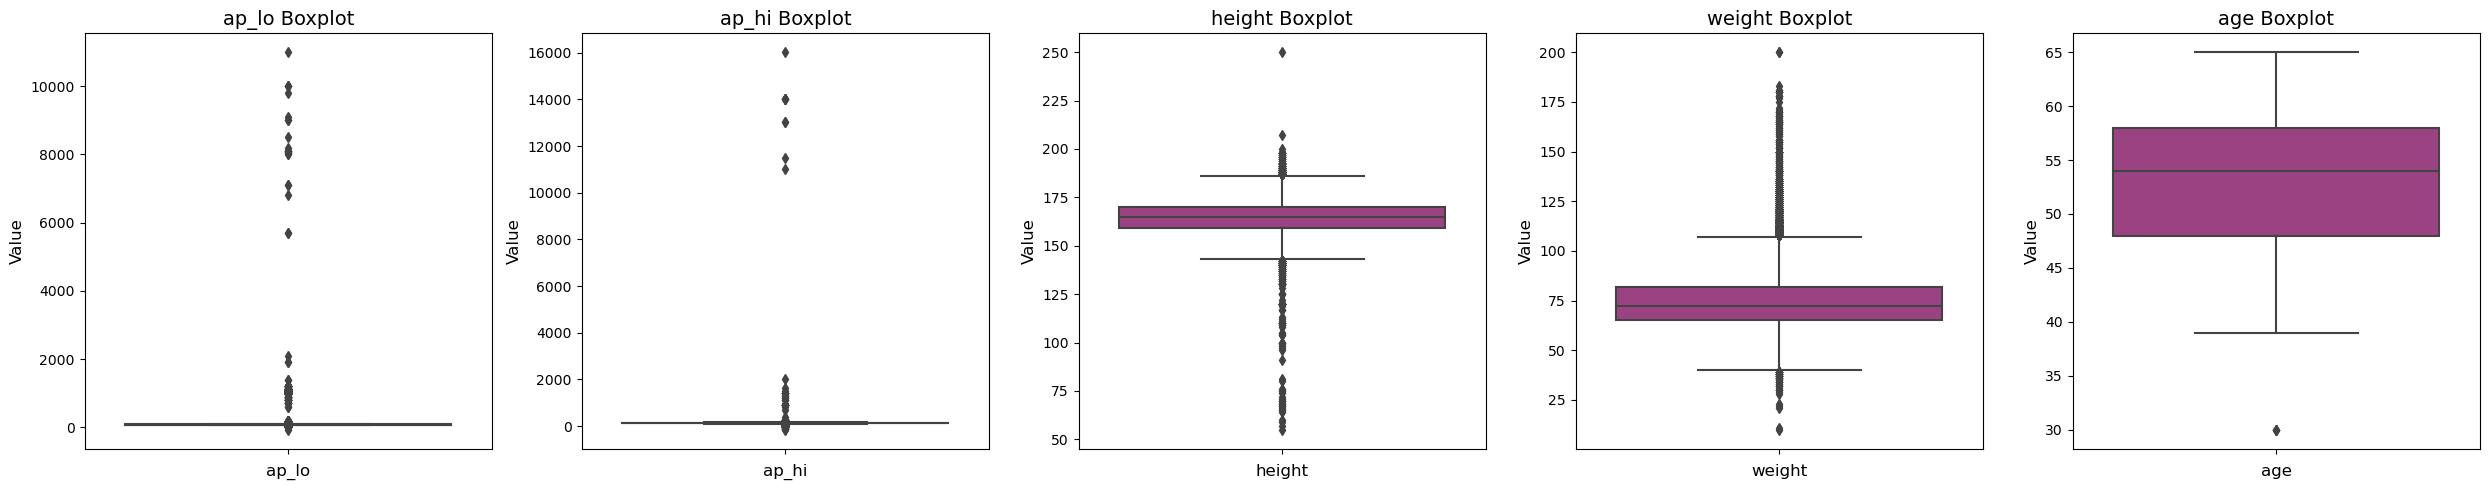

In [12]:
columns_name = ['ap_lo', 'ap_hi', 'height', 'weight', 'age']
colors = ['#AA3488']

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, column in enumerate(columns_name):
    sns.boxplot(ax=axes[i], y=column, data=df, palette=colors)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)
    axes[i].set_title(column + ' Boxplot', fontsize=14)

plt.tight_layout()
plt.show()

In [13]:
plt.style.use('ggplot')

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,69976.0,53.338945,6.765633,30.0,48.0,54.0,58.0,65.0
gender,69976.0,0.349648,0.476862,0.0,0.0,0.0,1.0,1.0
height,69976.0,164.359152,8.211218,55.0,159.0,165.0,170.0,250.0
weight,69976.0,74.208519,14.397211,10.0,65.0,72.0,82.0,200.0
ap_hi,69976.0,128.820453,154.037729,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69976.0,96.636261,188.504581,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69976.0,1.366997,0.680333,1.0,1.0,1.0,2.0,3.0
gluc,69976.0,1.226535,0.572353,1.0,1.0,1.0,1.0,3.0
smoke,69976.0,0.088159,0.283528,0.0,0.0,0.0,0.0,1.0
alco,69976.0,0.053790,0.225604,0.0,0.0,0.0,0.0,1.0


## Imputation

* Age

In [15]:
# Calculate the median age
median_age = df['age'].median()

# Identify outlier rows with ages outside 3 standard deviations from the mean
age_outlier_ids = df.index[np.abs(df['age'] - df['age'].mean()) > (3 * df['age'].std())]

# Replace outlier ages with the median age
df.loc[age_outlier_ids, "age"] = median_age

# Display the updated rows with replaced ages
df.loc[age_outlier_ids].head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
8850,54,0,175,59.0,120,80,1,1,0,0,1,0
31922,54,1,175,92.0,100,60,1,1,0,0,1,0
43842,54,0,159,59.0,120,80,1,1,0,0,1,0
79749,54,0,160,59.0,110,70,1,1,0,0,1,0


* Height

In [16]:
# Calculate the median height
median_height = df['height'].median()

# Identify outlier rows with heights outside 3 standard deviations from the mean
height_outlier_ids = df.index[np.abs(df['height'] - df['height'].mean()) > (3 * df['height'].std())]

# Replace outlier heights with the median height
df.loc[height_outlier_ids, "height"] = median_height

# Display the updated rows with replaced heights
df.loc[height_outlier_ids].head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
309,60,1,165,55.0,120,80,1,1,0,0,1,0
1432,42,1,165,111.0,148,86,1,1,0,0,1,1
1554,61,1,165,68.0,120,80,1,1,0,0,1,1
3049,44,1,165,74.0,140,90,1,1,1,1,1,1
3399,62,1,165,52.0,140,100,1,1,0,0,1,1


* Weight

In [17]:
# Calculate the median weight
median_weight = df['weight'].median()

# Identify outlier rows with weights outside 3 standard deviations from the mean
weight_outlier_ids = df.index[np.abs(df['weight'] - df['weight'].mean()) > (3 * df['weight'].std())]

# Replace outlier weights with the median weight
df.loc[weight_outlier_ids, "weight"] = median_weight

# Display the updated rows with replaced weights
df.loc[weight_outlier_ids].head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
474,58,0,157,72.0,120,80,1,1,0,0,1,1
552,46,1,165,72.0,120,80,1,1,0,0,1,0
618,46,0,186,72.0,130,70,1,1,0,0,0,0
634,58,1,178,72.0,160,90,1,3,0,0,1,1
846,40,0,164,72.0,130,90,1,1,0,0,0,0


* ap_hi and ap_lo

In [18]:
# Calculate the median values for 'ap_hi' and 'ap_lo'
median_ap_hi = df['ap_hi'].median()
median_ap_lo = df['ap_lo'].median()

# Identify outlier rows with 'ap_hi' values outside 3 standard deviations from the mean
ap_hi_outlier_ids = df.index[np.abs(df['ap_hi'] - df['ap_hi'].mean()) > (3 * df['ap_hi'].std())]

# Identify outlier rows with 'ap_lo' values outside 3 standard deviations from the mean
ap_lo_outlier_ids = df.index[np.abs(df['ap_lo'] - df['ap_lo'].mean()) > (3 * df['ap_lo'].std())]

# Replace outlier 'ap_hi' values with the median 'ap_hi' value
df.loc[ap_hi_outlier_ids, "ap_hi"] = median_ap_hi

# Replace outlier 'ap_lo' values with the median 'ap_lo' value
df.loc[ap_lo_outlier_ids, "ap_lo"] = median_ap_lo

# Display the updated rows with replaced values for 'ap_hi'
df.loc[ap_hi_outlier_ids].head()

# Display the updated rows with replaced values for 'ap_lo'
df.loc[ap_lo_outlier_ids].head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
314,48,1,183,98.0,160,80,1,2,1,0,1,1
334,60,1,157,60.0,160,80,2,1,0,0,0,1
357,50,0,150,83.0,140,80,1,1,0,0,1,1
458,64,0,176,63.0,160,80,2,2,0,0,0,1
482,51,0,154,81.0,140,80,2,1,0,0,1,1


In [25]:
print(df.loc[df.index.isin(ap_hi_outlier_ids)].shape[0])
df.loc[df.index.isin(ap_lo_outlier_ids)].shape[0]

38


951

In [26]:
ap_hi_outlier_ids2 = df.index[(df['ap_hi'] < 40) | (df['ap_hi'] > 300)]
df.loc[df.index.isin(ap_hi_outlier_ids2), "ap_hi"] = np.nan
ap_lo_outlier_ids2 = df.index[(df['ap_lo'] < 40) | (df['ap_lo'] > 300)]
df.loc[df.index.isin(ap_lo_outlier_ids2), "ap_lo"] = np.nan

# Transformations

## New feature

### Body Mass Index (BMI)  is a person's weight in kilograms divided by the square of height in meters.

#### For most adults, an ideal BMI is in the 18.5 to 24.9 range.

#### For children and young people aged 2 to 18, the BMI calculation takes into account age and gender as well as height and weight.

##### If your BMI is:

* below 18.5 – you're in the underweight range
* between 18.5 and 24.9 – you're in the healthy weight range
* between 25 and 29.9 – you're in the overweight range
* 30 or over – you're in the obese range 

In [27]:
df['bmi'] = df['weight'] / (df['height']/100)**2

In [31]:
# Categorize BMI into different groups based on specific ranges

df['bmiGrp'] = np.where((df.bmi < 18.5), 1, 0)
# If BMI is less than 18.5, assign category 1 (underweight), otherwise assign 0

df['bmiGrp'] = np.where((df.bmi >= 18.5) & (df.bmi < 24.9), 2, df.bmiGrp)
# If BMI is between 18.5 (inclusive) and 24.9 (exclusive), assign category 2 (normal weight), otherwise keep the existing category value

df['bmiGrp'] = np.where((df.bmi >= 25) & (df.bmi < 29.9), 3, df.bmiGrp)
# If BMI is between 25 (inclusive) and 29.9 (exclusive), assign category 3 (overweight), otherwise keep the existing category value

df['bmiGrp'] = np.where((df.bmi >= 30), 4, df.bmiGrp)
# If BMI is 30 or greater, assign category 4 (obese), otherwise keep the existing category value


### Blood Pressure Categories

* Normal: Below 120
* Elevated: 120-129
* Stage I: high blood pressure (also called hypertension): 130-139
* Stage II: hypertension: 140 or more
* Hypertensive crisis: 180 or more. Call 911.

In [35]:
df['bp'] = np.where((df.ap_hi < 120) & (df.ap_lo < 80), 1, 0)
# If both systolic pressure (ap_hi) is less than 120 and diastolic pressure (ap_lo) is less than 80, assign category 1 (normal), otherwise assign 0

df['bp'] = np.where((df.ap_hi >= 120) & (df.ap_hi < 130) & (df.ap_lo < 80), 2, df.bp)
# If systolic pressure is between 120 (inclusive) and 130 (exclusive), and diastolic pressure is less than 80, assign category 2 (elevant), otherwise keep the existing category value

df['bp'] = np.where((df.ap_hi >= 130) & (df.ap_hi < 140) | ((df.ap_lo >= 80) & (df.ap_lo < 90)), 3, df.bp)
# If systolic pressure is between 130 (inclusive) and 140 (exclusive), or diastolic pressure is between 80 (inclusive) and 90 (stage 1), assign category 3 (high-normal blood pressure), otherwise keep the existing category value

df['bp'] = np.where((df.ap_hi >= 140) | (df.ap_lo >= 90), 4, df.bp)
# If systolic pressure is 140 or greater, or diastolic pressure is 90 or greater, assign category 4 (hypertension), otherwise keep the existing category value

df['bp'] = np.where((df.ap_hi > 180) | (df.ap_lo > 120), 5, df.bp)
# If systolic pressure is 180 or greater, or diastolic pressure is 120 or greater, assign category 5 (severe hypertension), otherwise keep the existing category value


In [34]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmiGrp,bp
id,,,,,,,,,,,,,,,
0,50,1,168,62.0,110.0,80.0,1,1,0,0,1,0,21.967120,2,3
1,55,0,156,85.0,140.0,90.0,3,1,0,0,1,1,34.927679,4,4
2,52,0,165,64.0,130.0,70.0,3,1,0,0,0,1,23.507805,2,3
3,48,1,169,82.0,150.0,100.0,1,1,0,0,1,1,28.710479,3,4
4,48,0,156,56.0,100.0,60.0,1,1,0,0,0,0,23.011177,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53,1,168,76.0,120.0,80.0,1,1,1,0,1,0,26.927438,3,3
99995,62,0,158,72.0,140.0,90.0,2,2,0,0,1,1,28.841532,3,4
99996,52,1,183,105.0,180.0,90.0,3,1,0,1,0,1,31.353579,4,4


#### Total cholesterol

In [39]:
# Calculate the total cholesterol level by summing the values from 'cholesterol' and 'gluc' columns
df['total_chol'] = df['cholesterol'] + df['gluc']

#### Smoke and alko

In [42]:
# Check if a person both smokes and consumes alcohol, and assign 1 if true, otherwise assign 0
df['smoke_alco'] = np.where((df['smoke'] == 1) & (df['alco'] == 1), 1, 0)


#### Activity_level

In [43]:
# Categorize the activity level based on the 'active' column values into 'low', 'medium', and 'high'
df['activity_level'] = pd.cut(df['active'], bins=[0, 1, 2, 3], labels=['low', 'medium', 'high'])

#### Combining age and gender

In [46]:
# Creating a new feature by combining age and gender
df['age_gender'] = df['age'].astype(str) + '_' + df['gender'].astype(str)
# The 'age_gender' feature combines age and gender information to capture their joint effect on cardiovascular disease

#### Systolic and diastolic blood pressure

In [47]:
# Creating a new feature by combining systolic and diastolic blood pressure
df['blood_pressure'] = df['ap_hi'].astype(str) + '/' + df['ap_lo'].astype(str)
# The 'blood_pressure' feature combines systolic and diastolic blood pressure values to provide a comprehensive representation of blood pressure


#### Cholesterol ratio

In [48]:
# Creating a new feature to represent the cholesterol ratio
df['cholesterol_ratio'] = df['cholesterol'] / df['gluc']
# The 'cholesterol_ratio' feature calculates the ratio between total cholesterol and glucose levels, providing insights into the cholesterol profile


#### BMI into specific groups

In [49]:
# Creating a new feature to categorize BMI into specific groups
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
# The 'bmi_category' feature categorizes BMI values into specific groups, such as underweight, normal, overweight, and obese


#### Age ranges

In [50]:
# Creating a new feature to represent age ranges
df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70],
                         labels=['20-29', '30-39', '40-49', '50-59', '60-69'])
# The 'age_range' feature categorizes age values into specific ranges, allowing evaluation of different age groups' impact on cardiovascular disease


#### Weight status

In [51]:
# Creating a new feature to indicate weight status
df['weight_status'] = np.where(df['weight'] > df['weight'].median(), 'Overweight', 'Normal')
# The 'weight_status' feature categorizes individuals as either 'Overweight' or 'Normal' based on their weight compared to the median weight


In [52]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,bp,smoke_alco,activity_level,total_chol,age_gender,blood_pressure,cholesterol_ratio,bmi_category,age_range,weight_status
id,,,,,,,,,,,,,,,,,,,,,
0,50,1,168,62.0,110.0,80.0,1,1,0,0,...,3,0,low,2,50_1,110.0/80.0,1.0,Normal,40-49,Normal
1,55,0,156,85.0,140.0,90.0,3,1,0,0,...,4,0,low,4,55_0,140.0/90.0,3.0,Obese,50-59,Overweight
2,52,0,165,64.0,130.0,70.0,3,1,0,0,...,3,0,NaN,4,52_0,130.0/70.0,3.0,Normal,50-59,Normal
3,48,1,169,82.0,150.0,100.0,1,1,0,0,...,4,0,low,2,48_1,150.0/100.0,1.0,Overweight,40-49,Overweight
4,48,0,156,56.0,100.0,60.0,1,1,0,0,...,1,0,NaN,2,48_0,100.0/60.0,1.0,Normal,40-49,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53,1,168,76.0,120.0,80.0,1,1,1,0,...,3,0,low,2,53_1,120.0/80.0,1.0,Overweight,50-59,Overweight
99995,62,0,158,72.0,140.0,90.0,2,2,0,0,...,4,0,low,4,62_0,140.0/90.0,1.0,Overweight,60-69,Normal
99996,52,1,183,105.0,180.0,90.0,3,1,0,1,...,4,0,NaN,4,52_1,180.0/90.0,3.0,Obese,50-59,Overweight


# Correlation 

C:\Users\Mazi\AppData\Local\Temp\ipykernel_12428\3009926557.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


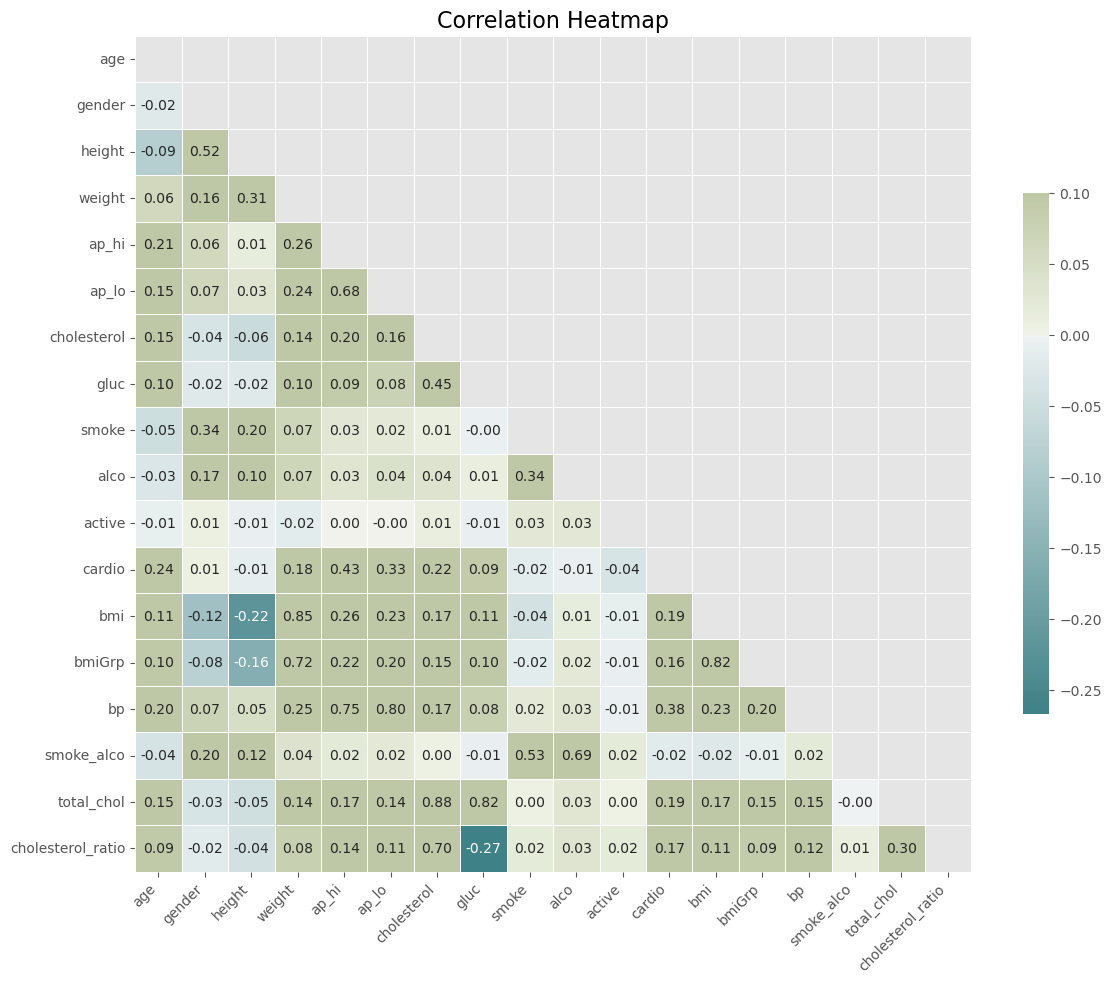

In [53]:
corr = df.corr()
cmap = sns.diverging_palette(200, 100, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.1, center=0, annot=True,
            fmt=".2f", square=True, linewidths=0.5, cbar_kws={"shrink": 0.6})

ax.set_title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()